In [102]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [103]:
# Loading the dataset
df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')

In [104]:
# General information on the data
# No misssing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [105]:
# Dropping columns not required for the study
df = df.drop(['n_daily_data_points', 'Slots_freed_sum', 'Slots_taken_sum', 'Utilib_taken_sum',
              'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
              'Slots_freed_sum', 'Slots_taken_sum'], axis = 1)

In [106]:
df.columns

Index(['Postal code', 'date', 'dayOfWeek', 'day_type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum'],
      dtype='object')

In [107]:
# converting to datetime
df['date'] = pd.to_datetime(df['date'])

In [108]:
# Checking the datatypes
df.dtypes

Postal code                       int64
date                     datetime64[ns]
dayOfWeek                         int64
day_type                         object
BlueCars_taken_sum                int64
BlueCars_returned_sum             int64
dtype: object

Size

In [109]:
print('No. of Rows: ' + str(df.shape[0]))
print('No. of Columns: ' + str(df.shape[1]))

No. of Rows: 16085
No. of Columns: 6


Previewing the data

In [110]:
df.head()

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,2018-01-01,0,weekday,110,103
1,75001,2018-01-02,1,weekday,98,94
2,75001,2018-01-03,2,weekday,138,139
3,75001,2018-01-04,3,weekday,104,104
4,75001,2018-01-05,4,weekday,114,117


Numeric Feature Description

In [111]:
df.describe()

,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
count,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,2.969599,125.926951,125.912714
std,7647.342000,2.008378,185.426579,185.501535
min,75001.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,20.000000,20.000000
50%,92340.000000,3.000000,46.000000,46.000000
75%,93400.000000,5.000000,135.000000,135.000000
max,95880.000000,6.000000,1352.000000,1332.000000


In [112]:
def plot_distribution(inp):
  plt.figure()
  ax = sns.distplot(inp)
  plt.axvline(np.mean(inp), color='k', linestyle='dashed', linewidth=5)
  _, max_ = plt.ylim()
  plt.text(
      inp.mean() + inp.mean()/10,
      max_ - max_/10,
      "Mean: {:.2f}".format(inp.mean())
  )
  return plt.figure()

**Sampling**

In [113]:
# Taking records from Postal Area 75015 and Postal Area 75017
population = df[(df['Postal code'] == 75015) |  (df['Postal code'] == 75017)]
population.head()

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
2184,75015,2018-01-01,0,weekday,781,843
2185,75015,2018-01-02,1,weekday,710,720
2186,75015,2018-01-03,2,weekday,739,752
2187,75015,2018-01-04,3,weekday,669,644
2188,75015,2018-01-05,4,weekday,852,846


In [114]:
# Sampling from postal area 75015
sample_015 = population[population['Postal code'] == 75015]['BlueCars_taken_sum'].sample(20)
sample_015.head(5)

2312     614
2216     942
2191     694
2280     887
2197    1097
Name: BlueCars_taken_sum, dtype: int64

<Figure size 432x288 with 0 Axes>

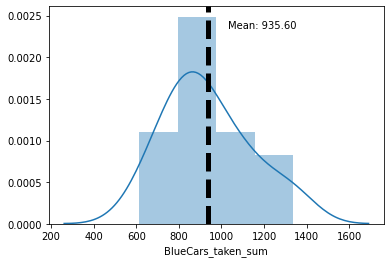

<Figure size 432x288 with 0 Axes>

In [115]:
# Plotting sample_015
plot_distribution(sample_015)

In [116]:
# Sampling from postal area 75017
sample_017 = population[population['Postal code'] == 75017]['BlueCars_taken_sum'].sample(20)
sample_017.head(5)

2534    644
2548    709
2576    753
2606    686
2615    739
Name: BlueCars_taken_sum, dtype: int64

<Figure size 432x288 with 0 Axes>

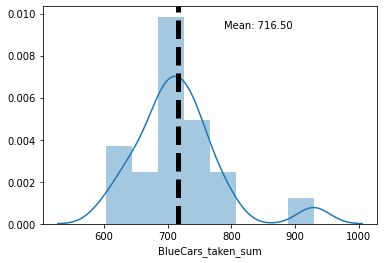

<Figure size 432x288 with 0 Axes>

In [117]:
# Plotting sample_017
plot_distribution(sample_017)

**Hypothesis testing**

Since we want to compare means of data sampled from the two postal codes, our sample shall be labelled as follows:

1. *sample_015:* sample taken from Postal area 75015 with sample size **n1 = 20**

2. *sample_017:* sample taken from Postal area 75017 with sample size **n2 = 20**


In [118]:
# Assumption on the model
# significance level is 0.05
sig_level = 0.05

In [119]:
# Computing mean and standard deviation for samples
# sample_015
mean1 = sample_015.mean()
sdev1 = sample_015.std()

# sample_017
mean2 = sample_017.mean()
sdev2 = sample_017.std()

In [120]:
# calculating the t-statistic
t = (mean1 - mean2)/((sdev1**2/20) + (sdev2**2/20))**0.5
print('t-statistic: ', t)

t-statistic:  4.585645579547398


In [121]:
## Compare with the critical t-value
#Degrees of freedom factoring that our sample size was 20 in each case
df = 2*20 - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print('p-value: ', p)

p-value:  2.399898938543199e-05


In [122]:
# Comparing p value to the alpha value
if p < sig_level:
  print('REJECT NULL HYPOTHESIS')
if p >= sig_level:
  print('ACCEPT NULL HYPOTHESIS')

REJECT NULL HYPOTHESIS
